<a href="https://colab.research.google.com/github/zhuohann/SP500PerfromancePredictionWithSentimentAnalysis/blob/master/S%26P_daily_direction_prediction_with_sentiment_analysis(Pandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install vaderSentiment
!pip install tf-nightly-2.0-preview
import csv
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tensorflow as tf
import numpy
from numpy import array
import pandas as pd
from tensorflow.keras.optimizers import RMSprop, Ftrl, Adagrad, SGD, Adadelta, Adam, Adamax, Nadam
print(tf.__version__)
analyser = SentimentIntensityAnalyzer()

2.0.0-dev20191002


In [0]:
SPIndex = pd.read_csv("/tmp/SPIndex.csv")
NewsCSV = pd.read_csv("/tmp/news.csv")


In [0]:
dataset_SP_Sentiment = pd.DataFrame(SPIndex,columns= ['Date','open','close'])
dataset_SP_Sentiment["close-open"] = dataset_SP_Sentiment["close"]-dataset_SP_Sentiment["open"]
dataset_SP_Sentiment['Date'] = pd.to_datetime(dataset_SP_Sentiment.Date)
#dataset_SP_Sentiment.head()

In [0]:
NewsCSV["Date"] = pd.to_datetime(NewsCSV.Date)
NewsCSV = NewsCSV.drop(columns = "Label")
#NewsCSV.head()

In [0]:
dataset_SP_Sentiment = pd.merge(left=dataset_SP_Sentiment,right=NewsCSV)
dataset_SP_Sentiment = dataset_SP_Sentiment.drop(columns = ["Top21","Top22","Top23","Top24","Top25"])
#dataset_SP_Sentiment.head()


In [0]:
sentimentscore = pd.DataFrame()
for i in range(20):
  ColumnName = "Top"+str(int(i+1))
  sentimentscore[ColumnName] = dataset_SP_Sentiment[ColumnName].apply(lambda x : analyser.polarity_scores(x[2:-1])['compound'])

In [100]:
sentimentscore.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20
0,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,-0.5719,-0.5994,-0.6486,-0.2263,-0.7645,0.0000,-0.5994,-0.5994,0.0000,0.2086,0.2023,0.0258
1,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,-0.3578,-0.3400,0.0000,0.7783,0.0000,-0.3818,-0.1027,-0.2960,-0.3804,-0.8271,0.0000,-0.5994
2,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,-0.7650,-0.7964,-0.4404,-0.8591,0.0000,0.5423,0.0000,0.0000,0.0772,-0.5994,-0.5859
3,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.5106,0.0000,0.3612,0.4574,0.4019,-0.2263,-0.2500,-0.2960,0.0000,0.0000,0.0000,0.0000,-0.5423,-0.0258
4,0.2023,-0.5994,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,-0.6808,-0.3400,0.0000,0.0000,0.0000,0.1779,0.0000,-0.6249,0.0000,-0.7579,-0.3182,0.0000


In [107]:
sentimentscore.corr()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20
Top1,1.000000,0.035126,0.037265,0.008519,0.005770,-0.001764,-0.005996,-0.009810,-0.009587,0.026874,-0.022761,0.001091,0.001319,-0.019062,0.019113,-0.014992,-0.015575,0.028504,0.065180,0.006098
Top2,0.035126,1.000000,0.018374,0.027386,0.023351,-0.026247,0.011391,0.017139,-0.012663,0.012971,-0.020735,0.021335,0.027009,0.034057,-0.035397,0.037167,0.001854,0.051821,0.045189,-0.000269
Top3,0.037265,0.018374,1.000000,0.011333,0.015917,0.028846,0.034839,0.007643,-0.023279,0.009269,0.024463,0.016886,0.014656,-0.056753,-0.001505,0.010845,-0.018783,0.032399,-0.010417,-0.001004
Top4,0.008519,0.027386,0.011333,1.000000,0.024058,-0.029202,-0.034263,0.044364,0.013384,0.033833,-0.023534,0.010455,0.021397,0.003111,-0.031273,-0.004297,0.001316,0.025776,-0.026088,0.033855
Top5,0.005770,0.023351,0.015917,0.024058,1.000000,0.039149,0.041620,-0.011560,0.039907,0.046917,0.010468,0.001031,0.008602,-0.006426,-0.020960,0.003837,0.031035,0.000886,-0.000848,0.004499
Top6,-0.001764,-0.026247,0.028846,-0.029202,0.039149,1.000000,0.015860,0.043500,-0.001127,0.014896,0.010459,-0.051471,0.010961,0.024295,0.016146,0.012578,0.032095,0.015036,0.005574,0.018897
Top7,-0.005996,0.011391,0.034839,-0.034263,0.041620,0.015860,1.000000,0.010743,-0.002354,0.030309,0.001136,0.004270,-0.003311,-0.003657,-0.033725,-0.032901,0.042921,0.021137,-0.019244,0.032125
Top8,-0.009810,0.017139,0.007643,0.044364,-0.011560,0.043500,0.010743,1.000000,-0.043634,-0.002642,0.024556,-0.007747,0.006478,0.026232,0.020431,0.019194,0.018005,0.009688,0.008607,0.026142
Top9,-0.009587,-0.012663,-0.023279,0.013384,0.039907,-0.001127,-0.002354,-0.043634,1.000000,-0.009983,0.002446,0.035190,-0.001382,-0.006635,-0.031295,-0.011914,-0.030366,0.027803,-0.006760,0.002866
Top10,0.026874,0.012971,0.009269,0.033833,0.046917,0.014896,0.030309,-0.002642,-0.009983,1.000000,0.009534,-0.003632,0.014621,-0.029808,0.016961,0.012341,-0.014589,-0.022189,-0.019268,-0.018827


In [0]:
dataset_SP_Sentiment['Up or Down'] = dataset_SP_Sentiment['close-open'].apply(lambda x : 1 if (x > 0) else 0)
#dataset_SP_Sentiment.head()

In [0]:
x_train = sentimentscore[300:1300]
y_train = dataset_SP_Sentiment['Up or Down'][301:1301]
x_valid = sentimentscore[1300:1325]
y_valid = dataset_SP_Sentiment['Up or Down'][1301:1326]


In [0]:
features = ["Top1","Top2","Top3","Top4","Top5","Top6","Top7","Top8","Top9","Top10","Top11","Top12","Top13","Top14","Top15","Top16","Top17","Top18","Top19","Top20"]

train_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(x_train.values, tf.float32), tf.cast(y_train.values, tf.int32))).batch(5)
valid_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(x_valid.values, tf.float32), tf.cast(y_valid.values, tf.int32))).batch(5)
#valid_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(x_valid[features].values, tf.float32), tf.cast(y_valid.values, tf.int32))).batch(5)

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1024),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(1, activation= "sigmoid")
])

model.compile(loss='binary_crossentropy',optimizer= SGD(lr = 5e-3),metrics=['binary_accuracy'])
history = model.fit(train_dataset,validation_data = valid_dataset,epochs=100,verbose=0)

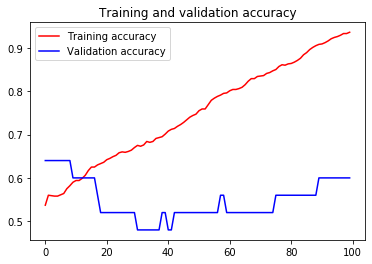

<Figure size 432x288 with 0 Axes>

In [120]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

startpoint = 0
epochs = range(len(acc))

plt.plot(epochs[startpoint:], acc[startpoint:], 'r', label='Training accuracy')
plt.plot(epochs[startpoint:], val_acc[startpoint:], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

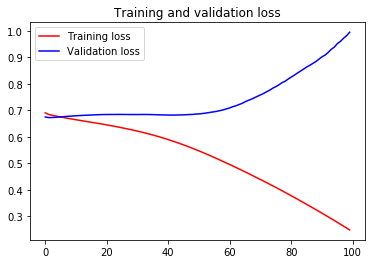

<Figure size 432x288 with 0 Axes>

In [121]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
startpoint = 0

plt.plot(epochs[startpoint:], loss[startpoint:], 'r', label='Training loss')
plt.plot(epochs[startpoint:], val_loss[startpoint:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [152]:
prediction  = model.predict(tf.cast(sentimentscore[1300:1305].values, tf.float32)).round().flatten()
prediction.astype(int)
actual = dataset_SP_Sentiment['Up or Down'][1301:1306].values
for x,y in zip(actual,prediction):
  print("Actual: {}    Prediction: {}".format(x,y))

Actual: 0    Prediction: 0.0
Actual: 1    Prediction: 1.0
Actual: 1    Prediction: 1.0
Actual: 1    Prediction: 1.0
Actual: 0    Prediction: 1.0
